In [ ]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
from skimage.filters  import threshold_otsu
from skimage.filters  import try_all_threshold
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage  import exposure
from skimage.transform  import rotate, rescale
from skimage import morphology
from skimage.restoration import inpaint
from skimage.util  import random_noise
from skimage.restoration  import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage import measure
from skimage.feature import canny
from skimage.feature import corner_harris, corner_peaks
from skimage.feature import Cascade
from skimage.color import gray2rgb
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, Adam, Adamax
from PIL import Image
from matplotlib import patches
from os import listdir
from matplotlib import image
import regex as re
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
pip install Pillow

In [ ]:
def show_image(image, title='Image', cmap_type='gray'):    
  plt.imshow(image, cmap=cmap_type)        
  plt.title(title)    
  plt.axis('off')    
  plt.show()

In [ ]:
def show_image_with_corners(image, coords, title="Corners detected"): 
  plt.imshow(image, interpolation='nearest', cmap='gray') 
  plt.title(title)
  plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15) 
  plt.axis('off')
  plt.show()

In [ ]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

In [ ]:
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()

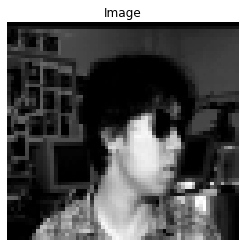

In [ ]:
image_an = mpimg.imread("/content/drive/My Drive/machine_learning/faces/an2i/an2i_left_angry_sunglasses_2.pgm") 
show_image(image_an)

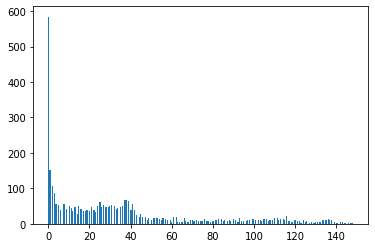

In [ ]:
plt.hist(image_an.ravel(), bins=256)
plt.show()

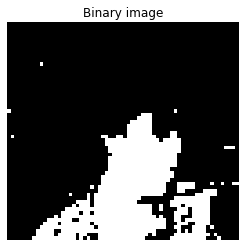

In [ ]:
#binary image
thresh = threshold_otsu(image_an)
binary1 = image_an > thresh
show_image(binary1, 'Binary image')

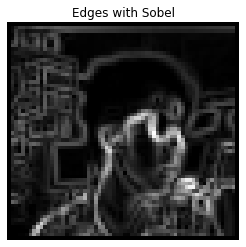

In [ ]:
edge_image = sobel(image_an)
show_image(edge_image, "Edges with Sobel")

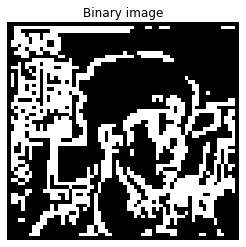

In [ ]:
adapthist_eq_image = exposure.equalize_adapthist(image_an, clip_limit=0.03)
edge_image = sobel(adapthist_eq_image)
thresh = threshold_otsu(edge_image)
binary = edge_image > thresh
show_image(binary, 'Binary image')

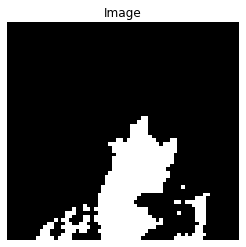

In [ ]:
eroded_image_shape = morphology.binary_erosion(binary1) 
show_image(eroded_image_shape)

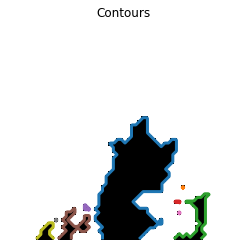

In [ ]:
contours = measure.find_contours(eroded_image_shape, 0.8)
show_image_contour(eroded_image_shape, contours)

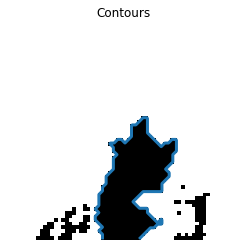

Dice's dots number: 1. 


In [ ]:
shape_contours = [cnt.shape[0] for cnt in contours]
max_dots_shape = 75
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] > max_dots_shape]
show_image_contour(eroded_image_shape, dots_contours)
print("Dice's dots number: {}. ".format(len(dots_contours)))

In [ ]:
from os import listdir

In [ ]:
# load all images in a directory
loaded_images = list()
column_names = list()
for filename in listdir('/content/drive/My Drive/machine_learning/all_images'):
  img_data = image.imread('/content/drive/My Drive/machine_learning/all_images/' + filename)
  column_names.append(filename)
  loaded_images.append(img_data)

In [ ]:
y_var = list()
for i in column_names:
  if re.match("an2i", i) is not None:
    y_var.append(1)
  elif re.match("at33", i) is not None:
    y_var.append(2)
  elif re.match("boland", i) is not None:
    y_var.append(3)
  elif re.match("bpm", i) is not None:
    y_var.append(4)
  elif re.match("ch4f", i) is not None:
    y_var.append(5)
  elif re.match("cheyer", i) is not None:
    y_var.append(6)
  elif re.match("choon", i) is not None:
    y_var.append(7)
  elif re.match("danieln", i) is not None:
    y_var.append(8)
  elif re.match("glickman", i) is not None:
    y_var.append(9)
  elif re.match("karyadi", i) is not None:
    y_var.append(10)
  elif re.match("kawamura", i) is not None:
    y_var.append(11)
  elif re.match("kk49", i) is not None:
    y_var.append(12)
  elif re.match("megak", i) is not None:
    y_var.append(13)
  elif re.match("mitchell", i) is not None:
    y_var.append(14)
  elif re.match("night", i) is not None:
    y_var.append(15)
  elif re.match("phoebe", i) is not None:
    y_var.append(16)
  elif re.match("saavik", i) is not None:
    y_var.append(17)
  elif re.match("steffi", i) is not None:
    y_var.append(18)
  elif re.match("sz24", i) is not None:
    y_var.append(19)
  else:
    y_var.append(20)

In [ ]:
X_all = np.array(loaded_images)
df = pd.DataFrame(y_var)
dummies  = pd.get_dummies(df.iloc[:,0])
y_all_dummies = dummies.to_numpy()

In [ ]:
#splitting the data into train test validation
#train and test
X_train, X_test, trainY, testY = train_test_split(X_all, y_all_dummies, test_size=0.1, random_state=1)
#train and validation 
X_train, X_val, trainY, valY = train_test_split(X_train, trainY, test_size=0.22, random_state=1)

In [ ]:
#reshaping the datasets
trainX = X_train.reshape((X_train.shape[0], 60, 64, 1))
valX = X_val.reshape((X_val.shape[0], 60, 64, 1))
testX = X_test.reshape((X_test.shape[0], 60, 64, 1))

In [ ]:
#normalization 
train_norm = trainX.astype('float32')
val_norm = valX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
val_norm = val_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
#modeling 
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 59, 63, 32)        160       
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 29, 31, 32)        0         
_________________________________________________________________
flatten_98 (Flatten)         (None, 28768)             0         
_________________________________________________________________
dense_196 (Dense)            (None, 100)               2876900   
_________________________________________________________________
dense_197 (Dense)            (None, 20)                2020      
Total params: 2,879,080
Trainable params: 2,879,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#modeling 
model1 = Sequential()
model1.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (2, 2)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 59, 63, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 30, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 13440)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1344100   
_________________________________________________________________
dense_3 (Dense)              (None, 20)               

In [ ]:
#modeling 
model2 = Sequential()
model2.add(Conv2D(64, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 59, 63, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 31, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5753700   
_________________________________________________________________
dense_5 (Dense)              (None, 20)                2020      
Total params: 5,756,040
Trainable params: 5,756,040
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=10, batch_size=10, validation_data=(valX, valY), verbose=0)

In [ ]:
history.history

In [ ]:
val_loss, val_acc = model.evaluate(valX,valY,verbose=0)
print(val_loss, val_acc)

0.08124328404664993 0.9919354915618896


In [ ]:
histor1 = model1.fit(trainX, trainY, epochs=10, batch_size=10, validation_data=(valX, valY), verbose=0)

In [ ]:
histor1.history

In [ ]:
histor2 = model1.fit(trainX, trainY, epochs=10, batch_size=10, validation_data=(valX, valY), verbose=0)

In [ ]:
histor2.history

In [ ]:
score_lr = []
bt = [10,20,30,40,50,60,70,80,90,100]
lr = [0.00001,0.0001,0.001,0.01,0.1,1]
for j in lr:
  score_batch = [] 
  for i in bt:
    model = Sequential()
    model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(20, activation='softmax'))
    opt = SGD(lr=j, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainX, trainY, epochs=10, batch_size=i, validation_data=(valX, valY), verbose=0)
    score = model.evaluate(valX, valY)
    score_batch.append(score)
  score_lr.append(score_batch)

4/4 [==============================] - 0s 19ms/step - loss: 3.0340 - accuracy: 0.0403


In [ ]:
score_lr_000001 = score_lr[0]
score_lr_00001  = score_lr[1]
score_lr_0001   = score_lr[2]
score_lr_001    = score_lr[3]
score_lr_01     = score_lr[4]
score_lr_1      = score_lr[5]

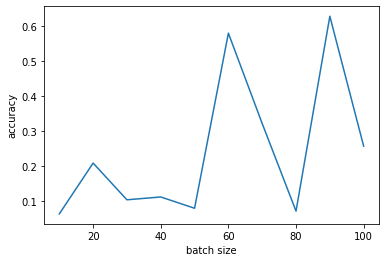

In [ ]:
test_accuracy_bt = []
test_loss_bt = []
for i in score_lr_000001:
  test_accuracy_bt.append(i[1])
  test_loss_bt.append(i[0])
plt.plot(bt,test_accuracy_bt)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

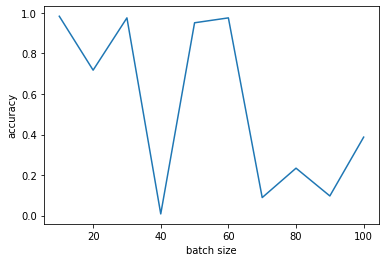

In [ ]:
test_accuracy_bt = []
test_loss_bt = []
for i in score_lr_00001:
  test_accuracy_bt.append(i[1])
  test_loss_bt.append(i[0])
plt.plot(bt,test_accuracy_bt)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

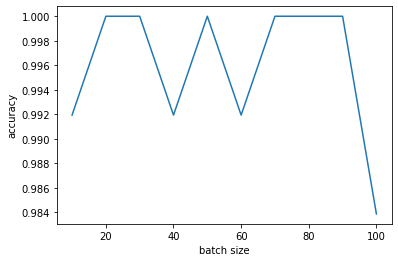

In [ ]:
test_accuracy_bt = []
test_loss_bt = []
for i in score_lr_0001:
  test_accuracy_bt.append(i[1])
  test_loss_bt.append(i[0])
plt.plot(bt,test_accuracy_bt)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

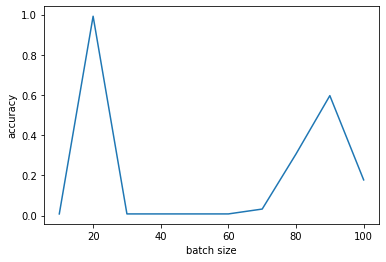

In [ ]:
test_accuracy_bt = []
test_loss_bt = []
for i in score_lr_001:
  test_accuracy_bt.append(i[1])
  test_loss_bt.append(i[0])
plt.plot(bt,test_accuracy_bt)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

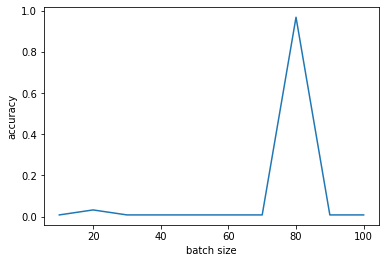

In [ ]:
test_accuracy_bt = []
test_loss_bt = []
for i in score_lr_01:
  test_accuracy_bt.append(i[1])
  test_loss_bt.append(i[0])
plt.plot(bt,test_accuracy_bt)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

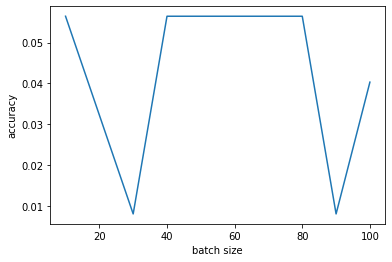

In [ ]:
test_accuracy_bt = []
test_loss_bt = []
for i in score_lr_1:
  test_accuracy_bt.append(i[1])
  test_loss_bt.append(i[0])
plt.plot(bt,test_accuracy_bt)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

In [ ]:
#modeling 
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 59, 63, 32)        160       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 29, 31, 32)        0         
_________________________________________________________________
flatten_68 (Flatten)         (None, 28768)             0         
_________________________________________________________________
dense_136 (Dense)            (None, 100)               2876900   
_________________________________________________________________
dense_137 (Dense)            (None, 20)                2020      
Total params: 2,879,080
Trainable params: 2,879,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)

In [ ]:
history.history

In [ ]:
val_loss, val_acc = model.evaluate(valX,valY,verbose=0)
print(val_loss, val_acc)

0.022740980610251427 1.0


In [ ]:
history = model.fit(train_norm, trainY, epochs=10, batch_size=50, validation_data=(val_norm, valY), verbose=0)

In [ ]:
history.history

In [ ]:
val_loss, val_acc = model.evaluate(val_norm,valY,verbose=0)
print(val_loss, val_acc)

2.71553635597229 0.5483871102333069


In [ ]:
#modeling 
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 59, 63, 32)        160       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 29, 31, 32)        0         
_________________________________________________________________
flatten_70 (Flatten)         (None, 28768)             0         
_________________________________________________________________
dense_140 (Dense)            (None, 100)               2876900   
_________________________________________________________________
dense_141 (Dense)            (None, 20)                2020      
Total params: 2,879,080
Trainable params: 2,879,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)

In [ ]:
val_loss, val_acc = model.evaluate(valX,valY,verbose=0)
print(val_loss, val_acc)

0.09224537014961243 0.9919354915618896


In [ ]:
activation_fn = []
activation = ['relu','tanh','sigmoid']
for i in activation:
  model = Sequential()
  model.add(Conv2D(32, (2, 2), activation=i, kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation = i, kernel_initializer='he_uniform'))
  model.add(Dense(20, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
  score = model.evaluate(valX, valY)
  activation_fn.append(score)

4/4 [==============================] - 0s 19ms/step - loss: 1.5225 - accuracy: 0.8952


In [ ]:
activation_fn

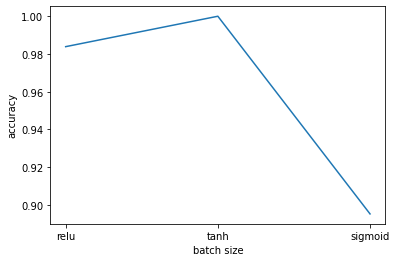

In [ ]:
test_accuracy_af = []
test_loss_af = []
for i in activation_fn:
  test_accuracy_af.append(i[1])
  test_loss_af.append(i[0])
plt.plot(activation,test_accuracy_af)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

In [ ]:
activation_fn = []
activation = ['relu','tanh','sigmoid']
for i in activation:
  model = Sequential()
  model.add(Conv2D(32, (2, 2), activation=i, kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation = i, kernel_initializer='he_uniform'))
  model.add(Dense(20, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
  score = model.evaluate(valX, valY)
  activation_fn.append(score)

4/4 [==============================] - 0s 19ms/step - loss: 1.5365 - accuracy: 0.9032


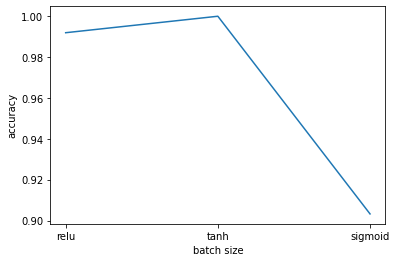

In [ ]:
test_accuracy_af = []
test_loss_af = []
for i in activation_fn:
  test_accuracy_af.append(i[1])
  test_loss_af.append(i[0])
plt.plot(activation,test_accuracy_af)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

In [ ]:
activation_fn = []
activation = ['relu','tanh','sigmoid']
for i in activation:
  model = Sequential()
  model.add(Conv2D(32, (2, 2), activation=i, kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation = i, kernel_initializer='he_uniform'))
  model.add(Dense(20, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
  score = model.evaluate(valX, valY)
  activation_fn.append(score)

4/4 [==============================] - 0s 20ms/step - loss: 1.5359 - accuracy: 0.9194


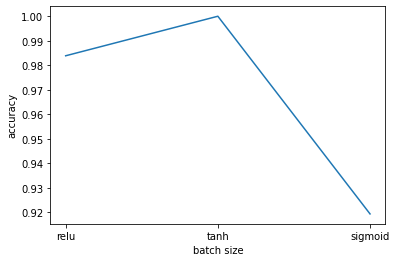

In [ ]:
test_accuracy_af = []
test_loss_af = []
for i in activation_fn:
  test_accuracy_af.append(i[1])
  test_loss_af.append(i[0])
plt.plot(activation,test_accuracy_af)
plt.ylabel("accuracy")
plt.xlabel("batch size")
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 19ms/step - loss: 0.1891 - accuracy: 1.0000


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 18ms/step - loss: 3.0220 - accuracy: 0.0081


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = Adamax(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 19ms/step - loss: 2.9463 - accuracy: 0.0565


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 19ms/step - loss: 0.0925 - accuracy: 1.0000


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='random_normal', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='random_normal'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 19ms/step - loss: 1.2207 - accuracy: 0.8548


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='random_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='random_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 20ms/step - loss: 0.4167 - accuracy: 0.9919


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='glorot_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 19ms/step - loss: 0.0997 - accuracy: 0.9919


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 20ms/step - loss: 0.0778 - accuracy: 1.0000


In [ ]:
# load all images in a directory
loaded_images = list()
column_names = list()
for filename in listdir('/content/drive/My Drive/machine_learning/all_images'):
  img_data = image.imread('/content/drive/My Drive/machine_learning/all_images/' + filename)
  edge_image = sobel(img_data)
  column_names.append(filename)
  loaded_images.append(edge_image)

In [ ]:
edge_image = []
for i in loaded_images:
  ei = sobel(i)
  edge_image.append(ei)

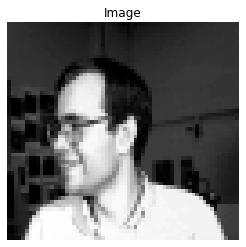

In [ ]:
show_image(loaded_images[500])

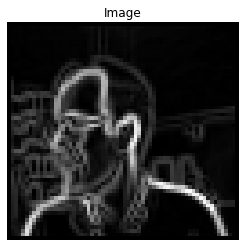

In [ ]:
show_image(edge_image[500])

In [ ]:
X_edge_all = np.array(edge_image)

In [ ]:
 X_edge_train, X_edge_test, y_edge_train, y_edge_test = train_test_split(X_edge_all, y_all_dummies, test_size=0.1, random_state=1)

In [ ]:
X_edge_train, X_edge_val, y_edge_train, y_edge_val = train_test_split(X_edge_train, y_edge_train, test_size=0.22, random_state=1)

In [ ]:
edge_trainX = X_edge_train.reshape((X_edge_train.shape[0], 60, 64, 1))
edge_valX = X_edge_val.reshape((X_edge_val.shape[0], 60, 64, 1))
edge_testX = X_edge_test.reshape((X_edge_test.shape[0], 60, 64, 1))

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(edge_trainX, y_edge_train, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(edge_valX, y_edge_val)

4/4 [==============================] - 0s 21ms/step - loss: 1.1221 - accuracy: 0.9597


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='tanh', kernel_initializer='he_uniform', input_shape=(60, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'tanh', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_data=(valX, valY), verbose=0)
score = model.evaluate(valX, valY)

4/4 [==============================] - 0s 21ms/step - loss: 0.0987 - accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 59, 63, 32)        160       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 29, 31, 32)        0         
_________________________________________________________________
flatten_104 (Flatten)        (None, 28768)             0         
_________________________________________________________________
dense_208 (Dense)            (None, 100)               2876900   
_________________________________________________________________
dense_209 (Dense)            (None, 20)                2020      
Total params: 2,879,080
Trainable params: 2,879,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history

{'accuracy': [0.19679634273052216,
  0.7734553813934326,
  0.9519450664520264,
  0.986270010471344,
  0.9931350350379944,
  1.0,
  0.9977116584777832,
  1.0,
  1.0,
  1.0],
 'loss': [2.760497570037842,
  1.3892713785171509,
  0.6194563508033752,
  0.3592097759246826,
  0.22389230132102966,
  0.15968623757362366,
  0.1299825757741928,
  0.10617048293352127,
  0.09156887233257294,
  0.08228561282157898],
 'val_accuracy': [0.5725806355476379,
  0.9112903475761414,
  0.9516128897666931,
  0.9838709831237793,
  0.9919354915618896,
  0.9919354915618896,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.9274053573608398,
  0.8863134980201721,
  0.49376222491264343,
  0.32460203766822815,
  0.210630863904953,
  0.16923876106739044,
  0.14367152750492096,
  0.12225449830293655,
  0.10666432231664658,
  0.09871204197406769]}

In [ ]:
score = model.evaluate(testX, testY)

2/2 [==============================] - 0s 13ms/step - loss: 0.0964 - accuracy: 1.0000


In [ ]:
test_classes = model.predict_classes(testX)

In [ ]:
testY_label = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

In [ ]:
test_df = pd.DataFrame(testY,columns=testY_label)

In [ ]:
testY_actual = test_df.idxmax(axis=1)
testY_actual = np.array(testY_actual)
testY_actual

array(['16', '10', '7', '7', '5', '6', '1', '2', '7', '18', '12', '18',
       '4', '17', '5', '5', '0', '1', '1', '17', '19', '14', '3', '13',
       '17', '2', '4', '18', '16', '6', '13', '10', '3', '12', '15', '7',
       '9', '5', '14', '13', '15', '4', '11', '1', '19', '7', '8', '10',
       '7', '2', '6', '4', '4', '17', '15', '0', '18', '16', '18', '14',
       '3', '11', '4'], dtype=object)

In [ ]:
test_classes

array([16, 10,  7,  7,  5,  6,  1,  2,  7, 18, 12, 18,  4, 17,  5,  5,  0,
        1,  1, 17, 19, 14,  3, 13, 17,  2,  4, 18, 16,  6, 13, 10,  3, 12,
       15,  7,  9,  5, 14, 13, 15,  4, 11,  1, 19,  7,  8, 10,  7,  2,  6,
        4,  4, 17, 15,  0, 18, 16, 18, 14,  3, 11,  4])